In [1]:
import numpy as np

feature = []
label = []

with open('/Users/songchenyu/Downloads/human+activity+recognition+using+smartphones/UCI HAR Dataset/train/X_train.txt', 'r') as file:
    for line in file:
        words = line.split()
        feature.append(words)
        
with open('/Users/songchenyu/Downloads/human+activity+recognition+using+smartphones/UCI HAR Dataset/test/X_test.txt', 'r') as file:
    for line in file:
        words = line.split()
        feature.append(words)


        
with open('/Users/songchenyu/Downloads/human+activity+recognition+using+smartphones/UCI HAR Dataset/train/y_train.txt', 'r') as file:
    for line in file:
        words = line.split()
        label.append(words[0])
        
with open('/Users/songchenyu/Downloads/human+activity+recognition+using+smartphones/UCI HAR Dataset/test/y_test.txt', 'r') as file:
    for line in file:
        words = line.split()
        label.append(words[0])


In [2]:
import pandas as pd

combined_list = [a + [b] for a, b in zip(feature, label)]
#combined_list = [(a, b) for a, b in zip(feature, label)]

df = pd.DataFrame(combined_list)
print(df.head())
df = df.apply(pd.to_numeric, errors='coerce')

              0                1                2                3    \
0  2.8858451e-001  -2.0294171e-002  -1.3290514e-001  -9.9527860e-001   
1  2.7841883e-001  -1.6410568e-002  -1.2352019e-001  -9.9824528e-001   
2  2.7965306e-001  -1.9467156e-002  -1.1346169e-001  -9.9537956e-001   
3  2.7917394e-001  -2.6200646e-002  -1.2328257e-001  -9.9609149e-001   
4  2.7662877e-001  -1.6569655e-002  -1.1536185e-001  -9.9813862e-001   

               4                5                6                7    \
0  -9.8311061e-001  -9.1352645e-001  -9.9511208e-001  -9.8318457e-001   
1  -9.7530022e-001  -9.6032199e-001  -9.9880719e-001  -9.7491437e-001   
2  -9.6718701e-001  -9.7894396e-001  -9.9651994e-001  -9.6366837e-001   
3  -9.8340270e-001  -9.9067510e-001  -9.9709947e-001  -9.8274984e-001   
4  -9.8081727e-001  -9.9048163e-001  -9.9832113e-001  -9.7967187e-001   

               8                9    ...              552              553  \
0  -9.2352702e-001  -9.3472378e-001  ...  -2.98676

In [3]:
import pandas as pd
import numpy as np

class_labels=[1,2,3,4,5,6]
print("class_lables:",class_labels)

data=df
N = len(data)
p = [] 


class_stats = {}
for label in class_labels:
    
    class_data = data[data[561] == label]
    features = class_data.iloc[:, :-1]
    mean_vector = np.mean(features, axis=0)
    
    lambda_ = 0.01  
    I = np.identity(features.shape[1])  
    cov_matrix = np.cov(features, rowvar=False) + lambda_ * I
    
    num_samples = len(class_data)
    class_stats[label] = {
        'mean_vector': mean_vector,
        'cov_matrix': cov_matrix,
        'num_samples': num_samples
    }

for label, stats in class_stats.items():
    print(f"Class {label}:")
    print("Mean Vector:")
    print(stats['mean_vector'])
    print("Covariance Matrix:")
    print(stats['cov_matrix'])
    print(f"Number of Samples: {stats['num_samples']}")
    print()


class_lables: [1, 2, 3, 4, 5, 6]
0      0.276337
1     -0.017907
2     -0.108882
3     -0.314644
4     -0.023583
         ...   
556    0.011332
557   -0.019443
558   -0.761886
559    0.218599
560    0.059771
Length: 561, dtype: float64
0      0.262295
1     -0.025923
2     -0.120538
3     -0.237990
4     -0.016033
         ...   
556   -0.129903
557    0.036432
558   -0.637980
559    0.278642
560    0.122794
Length: 561, dtype: float64
0      0.288137
1     -0.016312
2     -0.105762
3      0.100766
4      0.059549
         ...   
556    0.203588
557   -0.076029
558   -0.780873
559    0.200189
560    0.055866
Length: 561, dtype: float64
0      0.273060
1     -0.012690
2     -0.105517
3     -0.983446
4     -0.934881
         ...   
556    0.013413
557   -0.033260
558   -0.706042
559    0.006140
560   -0.089532
Length: 561, dtype: float64
0      0.279153
1     -0.016152
2     -0.106587
3     -0.984435
4     -0.932509
         ...   
556    0.004614
557    0.015957
558   -0.774143
559    

In [13]:
def calculate_cov_matrix(features, regularization_parameter):
    cov_matrix = np.cov(features, rowvar=False)
    cov_matrix_regularized = cov_matrix + regularization_parameter * np.identity(cov_matrix.shape[0])
    return cov_matrix_regularized

regularization_parameter = 0.01
class_stats = {}

for label in class_labels:
    class_data = data[data[561] == label]
    features = class_data.iloc[:, :-1]
    mean_vector = np.mean(features, axis=0)
    cov_matrix_regularized = calculate_cov_matrix(features, regularization_parameter)
    num_samples = len(class_data)
    
    class_stats[label] = {
        'mean_vector': mean_vector,
        'cov_matrix': cov_matrix_regularized,
        'num_samples': num_samples
    }


10299


In [5]:
def calculate_posterior(sample, mean_vector, cov_matrix, prior, num_samples):
    # 计算后验概率
    likelihood = (1 / ((2 * np.pi) ** (len(sample) / 2) * np.linalg.det(cov_matrix) ** 0.5)) * \
                np.exp(-0.5 * (sample - mean_vector).T @ np.linalg.inv(cov_matrix) @ (sample - mean_vector))
    posterior = likelihood * prior / (num_samples / N)
    return posterior

def bayesian_classifier(sample, class_stats):
    max_posterior = -1
    predicted_class = None
    
    for label, stats in class_stats.items():
        prior = stats['num_samples'] / N
        posterior = calculate_posterior(sample, stats['mean_vector'], stats['cov_matrix'], prior, stats['num_samples'])
        
        if posterior > max_posterior:
            max_posterior = posterior
            predicted_class = label
    
    return predicted_class

total_samples = 0
total_errors = 0

predicted_labels = []
for _, row in data.iterrows():
    sample = row.iloc[:-1]  
    true_label = row.iloc[-1]
    predicted_label = bayesian_classifier(sample, class_stats)
    predicted_labels.append(predicted_label)
    
    if true_label != predicted_label:
        total_errors += 1

    total_samples += 1

# 误差率估计
error_rate = total_errors / total_samples
print(f"Total errors: {total_errors}")
print(f"Error rate: {error_rate:.4f}")





/var/folders/vc/hp1kfbmj7lb7k9nhyd12slww0000gn/T/ipykernel_4651/530378728.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  likelihood = (1 / ((2 * np.pi) ** (len(sample) / 2) * np.linalg.det(cov_matrix) ** 0.5)) * \
/var/folders/vc/hp1kfbmj7lb7k9nhyd12slww0000gn/T/ipykernel_4651/530378728.py:3: RuntimeWarning: invalid value encountered in double_scalars
  likelihood = (1 / ((2 * np.pi) ** (len(sample) / 2) * np.linalg.det(cov_matrix) ** 0.5)) * \


Total errors: 7091
Error rate: 0.6885


In [6]:
# 将预测结果与真实标签进行比较
true_labels = data[561].tolist()
correct_predictions = np.sum(np.array(predicted_labels) == np.array(true_labels))
accuracy = correct_predictions / N

print(f"Accuracy: {accuracy:.2%}")


Accuracy: 31.15%


In [16]:
confusion_matrix = np.zeros((11, 11, 4), dtype=int)
print(confusion_matrix.shape)
num_classes=11
        
for true_label, predicted_label in zip(true_labels, predicted_labels):
    confusion_matrix[true_label, predicted_label, 0] += 1


print("Confusion Matrix:")
for true_label in range(num_classes):
    for predicted_label in range(num_classes):
        count = confusion_matrix[true_label, predicted_label, 0]
        print(f"True Label {true_label} - Predicted Label {predicted_label}: {count}")


(11, 11, 4)
Confusion Matrix:
True Label 0 - Predicted Label 0: 0
True Label 0 - Predicted Label 1: 0
True Label 0 - Predicted Label 2: 0
True Label 0 - Predicted Label 3: 0
True Label 0 - Predicted Label 4: 0
True Label 0 - Predicted Label 5: 0
True Label 0 - Predicted Label 6: 0
True Label 0 - Predicted Label 7: 0
True Label 0 - Predicted Label 8: 0
True Label 0 - Predicted Label 9: 0
True Label 0 - Predicted Label 10: 0
True Label 1 - Predicted Label 0: 0
True Label 1 - Predicted Label 1: 1722
True Label 1 - Predicted Label 2: 0
True Label 1 - Predicted Label 3: 0
True Label 1 - Predicted Label 4: 0
True Label 1 - Predicted Label 5: 0
True Label 1 - Predicted Label 6: 0
True Label 1 - Predicted Label 7: 0
True Label 1 - Predicted Label 8: 0
True Label 1 - Predicted Label 9: 0
True Label 1 - Predicted Label 10: 0
True Label 2 - Predicted Label 0: 0
True Label 2 - Predicted Label 1: 1544
True Label 2 - Predicted Label 2: 0
True Label 2 - Predicted Label 3: 0
True Label 2 - Predicted L

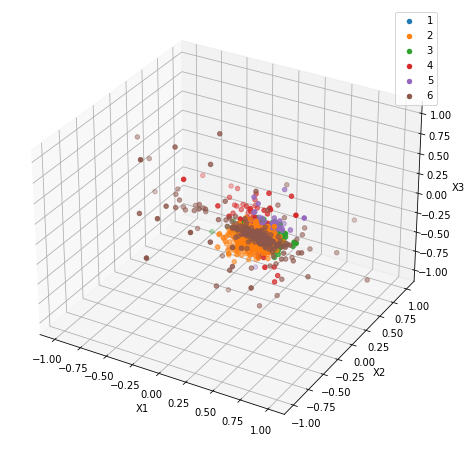

In [17]:
# 绘制数据和两个附加数据点
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 8))

for label in class_labels:
    # 按类别筛选数据
    class_data = data[data[561] == label]
    if not class_data.empty:
        ax = fig.gca(projection='3d')
        class_data =class_data.values
        ax.scatter(class_data[:, 0], class_data[:, 1], class_data[:, 2],label=label)

# 添加图例
ax.legend()
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.show()
